In [1]:
import numpy as np
import pandas as pd
import sys,os
import glob
import scipy.optimize as spo
sys.path.append(sys.path[0] + '/../MeasureMSP/')

import matplotlib.pyplot as plt
import matplotlib

from imp import reload
import platereaderclass as prc; reload(prc);
import plates_EstimateMSP as eMSP; reload(eMSP);


In [2]:
# general plot options

axes_fontsize    = 15  # size of numbers on axes
label_fontsize   = 15  # size of labels for axes
legend_fontsize  = 12
panelID_fontsize = 20  # size of panel indicator (A, B, C, ...)
plot_xfigsize    = 15



In [3]:
basedir = '../ExperimentalData/'

design_assignment_ChangeEPS = {  'ChangeEPS_WT.xlsx':         [0, 1, 2], 
                                 'ChangeEPS_TEM1.xlsx':       [0, 0, 1, 1, 2, 2], 
                                 'ChangeEPS_E104KG238S.xlsx': [0, 0, 1, 1, 2, 2],
                                 'ChangeEPS_G238S.xlsx':      [0, 0, 1, 1, 2, 2],
                                 'ChangeEPS_Triple.xlsx':     [0, 1, 2]}

design_assignment_ChangeRHO = {  'ChangeRHO_G238S.xlsx':    [0, 0, 0, 0, 0, 0, 0, 0],
                                 'ChangeRHO_Triple.xlsx':   [0, 0, 1, 1, 1, 1, 0, 0]}


def make_argparse_options(filename,design_assignment):
    return ['-qO','-i',basedir + filename.split('_')[0] + '/' + filename,'-M','NfuncB','BfuncN', 'BfuncLogN', '-D'] + [str(i) for i in design_assignment]

def AddDF(df1 = None,df2 = None):
    if df1 is None:    return df2
    elif df2 is None:  return df1
    else:              return pd.concat([df1,df2],ignore_index = True)

def split_allele_name_ChangeEPS(df):
    def split_iptg(allele):
        if allele[-4:].upper() == 'IPTG': return [allele[:-5],allele[-5:]]
        else:                             return [allele,'+IPTG']
    data = [x.strip('andy') for x in df['Title'].values]
    data = np.array([['ChangeEPS',split_iptg(x.split('_')[0])[0],split_iptg(x.split('_')[0])[1],x.split('_')[1]] for x in data])
    df['exp'] = 'ChangeEPS'
    df['Allele'] = data[:,1]
    df['ExprLevel'] = data[:,2]
    df['Repetition'] = data[:,3]
    return df

def split_allele_name_ChangeRHO(df):
    data = np.array([x.split('_') for x in df['Title'].values])
    df['exp'] = 'ChangeRHO'
    df['Allele'] = data[:,0]
    df['ExprLevel'] = data[:,1]
    df['Repetition'] = data[:,2]
    return df



In [4]:
results_ChangeEPS = None
for datafile in design_assignment_ChangeEPS.keys():
    print(datafile)
    curres = eMSP.EstimateMSP(params = make_argparse_options(datafile,design_assignment_ChangeEPS[datafile]))
    results_ChangeEPS = AddDF(results_ChangeEPS, curres)

results_ChangeRHO = None
for datafile in design_assignment_ChangeRHO.keys():
    print(datafile)
    curres = eMSP.EstimateMSP(params = make_argparse_options(datafile,design_assignment_ChangeRHO[datafile]))
    results_ChangeRHO = AddDF(results_ChangeRHO, curres)
    
results = AddDF(split_allele_name_ChangeEPS(results_ChangeEPS),split_allele_name_ChangeRHO(results_ChangeRHO))

results

ChangeEPS_WT.xlsx
ChangeEPS_TEM1.xlsx
ChangeEPS_E104KG238S.xlsx
ChangeEPS_G238S.xlsx
ChangeEPS_Triple.xlsx
ChangeRHO_G238S.xlsx
ChangeRHO_Triple.xlsx


,Title,Filename,NB_sMIC,NB_sMIC_stddev,NB_tau,NB_tau_stddev,NB_R2,BN_sMIC,BN_sMIC_stddev,BN_tau,...,BlN_itau_stddev,BlN_R2,BN_itau,BN_itau_stddev,NB_itau,NB_itau_stddev,exp,Allele,ExprLevel,Repetition
0,andyWT_A,../ExperimentalData/ChangeEPS/ChangeEPS_WT.xlsx,0.057485,0.107967,5.810472e+06,5.096531e+06,0.565178,0.103859,0.133159,1.028079e+07,...,2.366275e-08,0.565178,9.726884e-08,8.531728e-08,1.721031e-07,1.509565e-07,ChangeEPS,WT,+IPTG,A
1,andyWT_B,../ExperimentalData/ChangeEPS/ChangeEPS_WT.xlsx,0.043705,0.064954,3.841402e+06,2.520705e+06,0.699012,0.069469,0.080090,5.495473e+06,...,3.311628e-08,0.699012,1.819680e-07,1.194063e-07,2.603217e-07,1.708215e-07,ChangeEPS,WT,+IPTG,B
2,andyWT_C,../ExperimentalData/ChangeEPS/ChangeEPS_WT.xlsx,0.056324,0.078849,5.308747e+06,3.697534e+06,0.673351,0.084102,0.090536,7.884073e+06,...,2.280931e-08,0.673351,1.268380e-07,8.834245e-08,1.883684e-07,1.311983e-07,ChangeEPS,WT,+IPTG,C
3,TEM1-IPTG_A,../ExperimentalData/ChangeEPS/ChangeEPS_TEM1.xlsx,0.036567,0.023540,3.246233e+06,4.882126e+06,0.306577,0.044654,0.013181,1.058864e+07,...,5.368255e-08,0.306577,9.444087e-08,1.420330e-07,3.080493e-07,4.632864e-07,ChangeEPS,TEM1,-IPTG,A
4,TEM1+IPTG_A,../ExperimentalData/ChangeEPS/ChangeEPS_TEM1.xlsx,0.034087,0.017761,4.022229e+06,5.247436e+06,0.370096,0.040912,0.010604,1.086808e+07,...,4.000631e-08,0.370096,9.201257e-08,1.200404e-07,2.486184e-07,3.243498e-07,ChangeEPS,TEM1,+IPTG,A
5,TEM1-IPTG_B,../ExperimentalData/ChangeEPS/ChangeEPS_TEM1.xlsx,0.035006,0.043180,3.515605e+06,1.880574e+06,0.777520,0.050296,0.051579,4.521565e+06,...,3.280910e-08,0.777520,2.211624e-07,1.183046e-07,2.844460e-07,1.521564e-07,ChangeEPS,TEM1,-IPTG,B
6,TEM1+IPTG_B,../ExperimentalData/ChangeEPS/ChangeEPS_TEM1.xlsx,0.037940,0.043730,3.536742e+06,1.795033e+06,0.795168,0.052398,0.051129,4.447791e+06,...,3.164849e-08,0.795168,2.248307e-07,1.141103e-07,2.827461e-07,1.435045e-07,ChangeEPS,TEM1,+IPTG,B
7,TEM1-IPTG_C,../ExperimentalData/ChangeEPS/ChangeEPS_TEM1.xlsx,0.026702,0.024979,2.932262e+06,1.675113e+06,0.753949,0.035003,0.026807,3.889203e+06,...,3.925683e-08,0.753949,2.571221e-07,1.468861e-07,3.410337e-07,1.948223e-07,ChangeEPS,TEM1,-IPTG,C
8,TEM1+IPTG_C,../ExperimentalData/ChangeEPS/ChangeEPS_TEM1.xlsx,0.036541,0.029496,3.187322e+06,1.368595e+06,0.844328,0.044504,0.031822,3.774979e+06,...,3.283552e-08,0.844328,2.649021e-07,1.137456e-07,3.137430e-07,1.347172e-07,ChangeEPS,TEM1,+IPTG,C
9,E104KG238S-IPTG_A,../ExperimentalData/ChangeEPS/ChangeEPS_E104KG...,0.516232,0.369723,9.547919e+05,4.244176e+05,0.835009,0.621101,0.389914,1.143451e+06,...,1.078190e-07,0.835009,8.745455e-07,3.887470e-07,1.047349e-06,4.655603e-07,ChangeEPS,E104KG238S,-IPTG,A


In [5]:
colors    = {'ChangeEPS':'#3465a4','ChangeRHO':'TAB:ORANGE'}
alleles   = {'WT':'+','TEM1': 3,'G238S': 4,'E104KG238S': 5,'Triple': 6}
exprlevel = {'-IPTG':1,'+IPTG':3,'None':3,'Low':3,'Med':3,'High':3}

ChangeRHO_colors = pd.DataFrame(data = [['ChangeRHO','High', '#cc0000'], ['ChangeRHO','Med', '#edd400'], ['ChangeRHO','Low','#4e9a06'], ['ChangeRHO','None','#555753']],columns = ['exp','ExprLevel','color'])

plot_color_shape = results[['exp','Allele','ExprLevel']].copy().drop_duplicates()

plot_color_shape['color'] = plot_color_shape['exp'].map(colors)
plot_color_shape['shape'] = plot_color_shape['Allele'].map(alleles)
plot_color_shape['fill']  = plot_color_shape['ExprLevel'].map(exprlevel)


plot_color_shape = plot_color_shape.merge(ChangeRHO_colors, left_on = ['exp','ExprLevel'], right_on = ['exp','ExprLevel'], how = 'left')
plot_color_shape['color_y'].fillna(plot_color_shape['color_x'],inplace = True)
plot_color_shape.drop(columns = 'color_x',inplace = True)
plot_color_shape.rename(columns = {'color_y':'color'}, inplace = True)

plot_color_shape.set_index(['exp','Allele','ExprLevel'],inplace = True)

plot_color_shape


shape  fill    color
exp       Allele     ExprLevel                     
ChangeEPS WT         +IPTG         +     3  #3465a4
          TEM1       -IPTG         3     1  #3465a4
                     +IPTG         3     3  #3465a4
          E104KG238S -IPTG         5     1  #3465a4
                     +IPTG         5     3  #3465a4
          G238S      -IPTG         4     1  #3465a4
                     +IPTG         4     3  #3465a4
          Triple     +IPTG         6     3  #3465a4
ChangeRHO G238S      None          4     3  #555753
                     High          4     3  #cc0000
                     Med           4     3  #edd400
                     Low           4     3  #4e9a06
          Triple     None          6     3  #555753
                     High          6     3  #cc0000
                     Med           6     3  #edd400
                     Low           6     3  #4e9a06

In [6]:
def polygon(corners = 4, inner = False, cross = False, linedist = .45):
    if corners == '+':
        vertices           = [[0,1],[0,-1],[-1,0],[1,0]]
        codes              = [matplotlib.path.Path.MOVETO, matplotlib.path.Path.LINETO, matplotlib.path.Path.MOVETO, matplotlib.path.Path.LINETO]
    else:
        vertices           = [[np.sin(2*np.pi*i/corners), np.cos(2*np.pi*i/corners)] for i in range(corners + 1)]
        codes              = [matplotlib.path.Path.MOVETO] + [matplotlib.path.Path.LINETO for i in range(corners-1)] + [matplotlib.path.Path.CLOSEPOLY]
        if inner:
            scalereduction = (np.cos(np.pi/corners) - linedist)/np.cos(np.pi/corners)
            vertices       = np.concatenate([vertices,np.multiply(scalereduction, vertices)])
            codes          = np.concatenate([codes,codes])
        if cross:
            vertices       = np.concatenate([vertices, [[0,1],[0,-1],[-1,0],[1,0]]])
            codes          = np.concatenate([codes, [matplotlib.path.Path.MOVETO, matplotlib.path.Path.LINETO, matplotlib.path.Path.MOVETO, matplotlib.path.Path.LINETO]])
    return matplotlib.path.Path(vertices, codes)


def plotoptions(datarow, errorbars = False):        
    ret = {}
    
    idx = (datarow['exp'], datarow['Allele'], datarow['ExprLevel'])
    
    if not errorbars:
        ret['edgecolor'] = plot_color_shape.loc[idx]['color']
        ret['marker']    = polygon( corners =  plot_color_shape.loc[idx]['shape'],
                                    inner   = (plot_color_shape.loc[idx]['fill'] == 2),
                                    cross   = (plot_color_shape.loc[idx]['fill'] == 0))
        ret['facecolor'] = (plot_color_shape.loc[idx]['color'] if plot_color_shape.loc[idx]['fill'] == 3 else 'None')
        ret['alpha']     = 1
        ret['s']         = 200
    else:
        ret['alpha']     = 0.4
        ret['c']         = plot_color_shape.loc[idx]['color']
    ret['lw']        = 3
    return ret



ChangeEPS mu0 4.091e-02
ChangeEPS phi 1.374e+07 1.134e+07
ChangeRHO mu0 5.712e-02
ChangeRHO phi 2.935e+06 2.163e+06
ChangeEPS mu0 4.091e-02
ChangeEPS phi 1.374e+07 1.134e+07
ChangeRHO mu0 5.712e-02
ChangeRHO phi 2.935e+06 2.163e+06


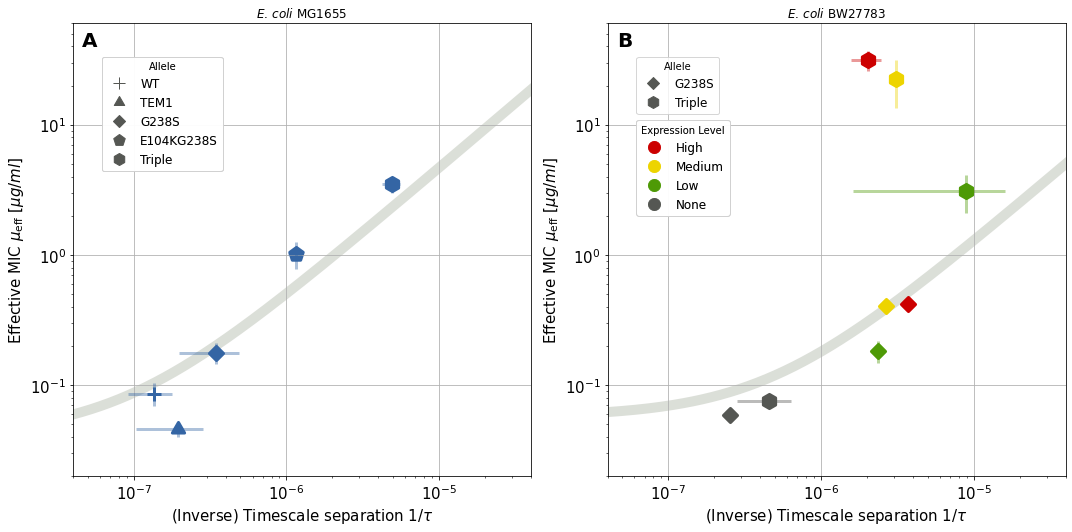

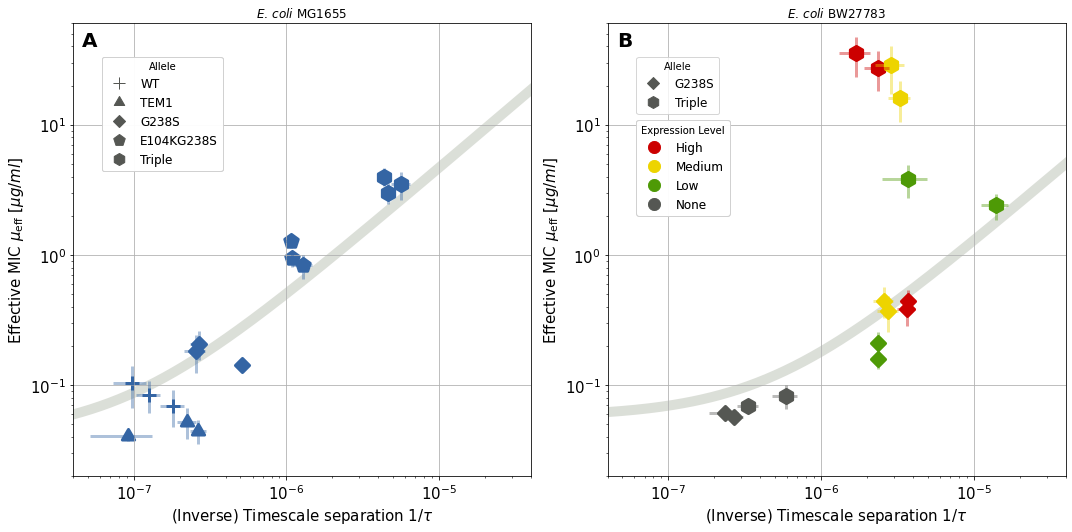

In [7]:
ChangeEPS_label = r'$E.\,coli~\mathrm{MG1655}$'
ChangeRHO_label = r'$E.\,coli~\mathrm{BW27783}$'

def PlotTauMIC(filename                = 'tau_smic.pdf',
               exclude_experiment_keys = [],
               exclude_from_fit        = [],
               separate_strains        = False,
               show_errors             = False,
               average_replicates      = False,
               experiments_for_mu      = [] ):
    
    legendpos_allele  = (0.05,0.94)
    legendpos_exprlvl = (0.05,0.80)
    legendpos_strain  = (0.05,0.50)
    
    def logmueff(tau,m0,phi):
        return np.log((1+phi/tau)*m0)
    
    def logphitau(tau,phi):
        return np.log(1 + phi/tau)
    
    results_local = results[~results['Title'].isin(exclude_experiment_keys)].copy()
    
    if average_replicates:
        results_local = results_local.groupby(['exp','Allele','ExprLevel']).agg({'BlN_sMIC':['mean','std'],'BlN_itau':['mean','std']}).reset_index()
        results_local.columns = ['exp','Allele','ExprLevel','BlN_sMIC','BlN_sMIC_stddev','BlN_itau','BlN_itau_stddev']

    fitvalues    = {}
    cov          = {}
    mu0_estimate = {}
    
    for exp in ['ChangeEPS','ChangeRHO']:
        tau                      = 1/results[(results['exp'] == exp) & ~results['Title'].isin(exclude_experiment_keys) & ~results['Title'].isin(exclude_from_fit)]['BlN_itau'].values
        mueff                    = results[(results['exp'] == exp) & ~results['Title'].isin(exclude_experiment_keys) & ~results['Title'].isin(exclude_from_fit)]['BlN_sMIC'].values
        mu0                      = results[(results['exp'] == exp) & ~results['Title'].isin(exclude_experiment_keys) & ~results['Title'].isin(exclude_from_fit) & results['Title'].isin(experiments_for_mu)]['BlN_sMIC'].values
        
        if len(mu0) > 0:
            mu0_estimate[exp]    = np.mean(mu0)
        else:
            mu0_estimate[exp]    = np.min(mueff)
        
        mueff_reduced            = mueff/mu0_estimate[exp]
        
        #print(mu0_estimate[exp],mueff_reduced)
        phi_estimate             = np.exp(np.mean(np.log(tau)) + np.mean(np.log(mueff)))/mu0_estimate[exp]
        
        fitvalues[exp], cov[exp] = spo.curve_fit(logphitau,tau, np.log(mueff_reduced),p0 = [phi_estimate], maxfev = 10000)
        
        print('{:6s} mu0 {:.3e}'.       format(exp, mu0_estimate[exp]))
        print('{:6s} phi {:.3e} {:.3e}'.format(exp, phi_estimate, fitvalues[exp][0]))

    if not separate_strains:
        fig,ax           = plt.subplots(1,1,figsize = (plot_xfigsize/2,plot_xfigsize/2))
        axplot = {'ChangeEPS':ax,'ChangeRHO':ax}
    else:
        fig,ax = plt.subplots(1,2,figsize = (plot_xfigsize,plot_xfigsize/2))
        axplot = {'ChangeEPS':ax[0], 'ChangeRHO':ax[1]}
        
    for index,experiment in results_local.iterrows():
        if show_errors:
            axplot[experiment['exp']].errorbar(experiment['BlN_itau'],experiment['BlN_sMIC'], yerr = experiment['BlN_sMIC_stddev'], xerr = experiment['BlN_itau_stddev'],  **plotoptions(experiment, errorbars=True))
        axplot[experiment['exp']].scatter(experiment['BlN_itau'],experiment['BlN_sMIC'], **plotoptions(experiment))

    axplot['ChangeEPS'].set_yscale('log')
    axplot['ChangeEPS'].set_xscale('log')
    axplot['ChangeEPS'].set_xlim([4e-8,4e-5])
    axplot['ChangeEPS'].set_ylim([2e-2,6e1])
    axplot['ChangeEPS'].set_xlabel(r'(Inverse) Timescale separation $1/\tau$', fontsize = label_fontsize)
    axplot['ChangeEPS'].set_ylabel(r'Effective MIC $\mu_\mathrm{{eff}}$ $[\mu g/ml]$', fontsize = label_fontsize)
    axplot['ChangeEPS'].tick_params(labelsize = axes_fontsize)

    if separate_strains:
        axplot['ChangeRHO'].set_yscale('log')
        axplot['ChangeRHO'].set_xscale('log')
        axplot['ChangeRHO'].set_xlim([4e-8,4e-5])
        axplot['ChangeRHO'].set_ylim([2e-2,6e1])
        axplot['ChangeRHO'].set_xlabel(r'(Inverse) Timescale separation $1/\tau$', fontsize = label_fontsize)
        axplot['ChangeRHO'].set_ylabel(r'Effective MIC $\mu_\mathrm{{eff}}$ $[\mu g/ml]$', fontsize = label_fontsize)
        axplot['ChangeRHO'].tick_params(labelsize = axes_fontsize)

    xx = np.exp(np.linspace(np.log(axplot['ChangeEPS'].get_xlim()[0]), np.log(axplot['ChangeEPS'].get_xlim()[1]), num = 200))
    axplot['ChangeEPS'].plot(xx,np.exp(logphitau(1/xx,fitvalues['ChangeEPS'][0])) * mu0_estimate['ChangeEPS'],   c = '#d3d7cf',   lw = 10, alpha = .8, zorder = -2)
    axplot['ChangeRHO'].plot(xx,np.exp(logphitau(1/xx,fitvalues['ChangeRHO'][0])) * mu0_estimate['ChangeRHO'], c = '#d3d7cf', lw = 10, alpha = .8, zorder = -2)

    legendcolor = '#555753'
    if not separate_strains:
        allele_legend_markers = [matplotlib.lines.Line2D([0],[0], marker = polygon(corners = marker), color = legendcolor, markersize = 12, linestyle='None') for label,marker in alleles.items()]
        allele_legend_labels  = [label for label,marker in alleles.items()]
        allele_legend = plt.legend(allele_legend_markers, allele_legend_labels, title = 'Allele',bbox_to_anchor = legendpos_allele, loc = 'upper left', fontsize = legend_fontsize)
        axplot['ChangeEPS'].add_artist(allele_legend)

        exprlvl_legend_markers = [  matplotlib.lines.Line2D([0],[0], marker = polygon(20, False),       markerfacecolor = legendcolor, markeredgecolor = legendcolor, linestyle = 'None', markersize = 12),
                                    matplotlib.lines.Line2D([0],[0], marker = polygon(20, True),        markerfacecolor = 'None',      markeredgecolor = legendcolor, linestyle = 'None', markersize = 12),
                                    matplotlib.lines.Line2D([0],[0], marker = polygon(20, False),       markerfacecolor = 'None',      markeredgecolor = legendcolor, linestyle = 'None', markersize = 12),
                                    matplotlib.lines.Line2D([0],[0], marker = polygon(20, False, True), markerfacecolor = 'None',      markeredgecolor = legendcolor, linestyle = 'None', markersize = 12)]
        exprlvl_legend_labels  = ['High', 'Medium', 'Low', 'None']

        exprlvl_legend = plt.legend(exprlvl_legend_markers, exprlvl_legend_labels, title = 'Expression Level', bbox_to_anchor = legendpos_exprlvl, loc = 'upper left', fontsize = legend_fontsize)
        axplot['ChangeEPS'].add_artist(exprlvl_legend)

        strain_legend_markers = [   matplotlib.lines.Line2D([0],[0], marker = polygon(6,False), markerfacecolor = colors1['andy'],   markeredgecolor = colors1['andy'],   linestyle = 'None', markersize = 12),
                                    matplotlib.lines.Line2D([0],[0], marker = polygon(6,False), markerfacecolor = colors1['ChangeRHO'], markeredgecolor = colors1['ChangeRHO'], linestyle = 'None', markersize = 12)]
        strain_legend_labels  = [ChangeEPS_label, ChangeRHO_label]
        axplot['ChangeEPS'].legend(strain_legend_markers, strain_legend_labels, title = 'Strain', bbox_to_anchor = legendpos_strain, loc = 'upper left', fontsize = legend_fontsize)
        axplot['ChangeEPS'].grid()
        #axplot['ChangeEPS'].annotate('A',[.03,.93],weight='bold',fontsize = panelID_fontsize, xycoords = 'axes fraction')

    
    else:
        allele_legend_markers1 = [matplotlib.lines.Line2D([0],[0], marker = polygon(corners = marker), color = legendcolor, markersize = 12, linestyle='None') for label,marker in alleles.items()]
        allele_legend_labels1  = [label for label,marker in alleles.items()]
        allele_legend1 = axplot['ChangeEPS'].legend(allele_legend_markers1, allele_legend_labels1, title = 'Allele',bbox_to_anchor = legendpos_allele, loc = 'upper left', fontsize = legend_fontsize)
        axplot['ChangeEPS'].add_artist(allele_legend1)

        allele_legend_markers2 = [matplotlib.lines.Line2D([0],[0], marker = polygon(corners = marker), color = legendcolor, markersize = 12, linestyle='None') for label,marker in [('G238S',4),('Triple',6)]]
        allele_legend_labels2  = ['G238S','Triple']
        allele_legend2 = axplot['ChangeRHO'].legend(allele_legend_markers2, allele_legend_labels2, title = 'Allele',bbox_to_anchor = legendpos_allele, loc = 'upper left', fontsize = legend_fontsize)
        axplot['ChangeRHO'].add_artist(allele_legend2)

        #exprlvl_legend_markers1 = [  matplotlib.lines.Line2D([0],[0], marker = polygon(20, False),       markerfacecolor = plot_color_shape.loc[('ChangeRHO','G238S','High')]['color'], markeredgecolor = plot_color_shape.loc[('ChangeRHO','G238S','High')]['color'], linestyle = 'None', markersize = 12),
        #                             matplotlib.lines.Line2D([0],[0], marker = polygon(20, True),        markerfacecolor = 'None',      markeredgecolor = plot_color_shape.loc[('ChangeRHO','G238S','Med')]['color'], linestyle = 'None', markersize = 12),
        #                             matplotlib.lines.Line2D([0],[0], marker = polygon(20, False),       markerfacecolor = 'None',      markeredgecolor = plot_color_shape.loc[('ChangeRHO','G238S','Low')]['color'], linestyle = 'None', markersize = 12),
        #                             matplotlib.lines.Line2D([0],[0], marker = polygon(20, False, True), markerfacecolor = 'None',      markeredgecolor = plot_color_shape.loc[('ChangeRHO','G238S','None')]['color'], linestyle = 'None', markersize = 12)]
        #exprlvl_legend_labels1  = ['High', 'Medium', 'Low', 'None']
        #exprlvl_legend1 = axplot['ChangeEPS'].legend(exprlvl_legend_markers1, exprlvl_legend_labels1, title = 'Expression Level', bbox_to_anchor = legendpos_exprlvl, loc = 'upper left', fontsize = legend_fontsize)
        #axplot['ChangeEPS'].add_artist(exprlvl_legend1)

        exprlvl_legend_markers2 = [  matplotlib.lines.Line2D([0],[0], marker = polygon(20, False), markerfacecolor = plot_color_shape.loc[('ChangeRHO','G238S','High')]['color'], markeredgecolor = plot_color_shape.loc[('ChangeRHO','G238S','High')]['color'], linestyle = 'None', markersize = 12),
                                     matplotlib.lines.Line2D([0],[0], marker = polygon(20, False), markerfacecolor = plot_color_shape.loc[('ChangeRHO','G238S','Med')]['color'],      markeredgecolor = plot_color_shape.loc[('ChangeRHO','G238S','Med')]['color'], linestyle = 'None', markersize = 12),
                                     matplotlib.lines.Line2D([0],[0], marker = polygon(20, False), markerfacecolor = plot_color_shape.loc[('ChangeRHO','G238S','Low')]['color'],      markeredgecolor = plot_color_shape.loc[('ChangeRHO','G238S','Low')]['color'], linestyle = 'None', markersize = 12),
                                     matplotlib.lines.Line2D([0],[0], marker = polygon(20, False), markerfacecolor = plot_color_shape.loc[('ChangeRHO','G238S','None')]['color'],      markeredgecolor = plot_color_shape.loc[('ChangeRHO','G238S','None')]['color'], linestyle = 'None', markersize = 12)]
        exprlvl_legend_labels2  = ['High', 'Medium', 'Low', 'None']
        exprlvl_legend2 = axplot['ChangeRHO'].legend(exprlvl_legend_markers2, exprlvl_legend_labels2, title = 'Expression Level', bbox_to_anchor = legendpos_exprlvl, loc = 'upper left', fontsize = legend_fontsize)
        axplot['ChangeRHO'].add_artist(exprlvl_legend2)
        
        axplot['ChangeEPS'].set_title(ChangeEPS_label)
        axplot['ChangeRHO'].set_title(ChangeRHO_label)
        
        axplot['ChangeEPS'].annotate('A',[.02,.95],weight='bold',fontsize = panelID_fontsize, xycoords = 'axes fraction')
        axplot['ChangeRHO'].annotate('B',[.02,.95],weight='bold',fontsize = panelID_fontsize, xycoords = 'axes fraction')

        
        axplot['ChangeEPS'].grid(zorder = -1)
        axplot['ChangeRHO'].grid(zorder= -1)
    
    #print(results_local)
    
    fig.tight_layout()
    if isinstance(filename,list):
        for f in filename:
            fig.savefig(f)
    else:
        fig.savefig(filename)


PlotTauMIC(filename = ['fig4_tauscmic.pdf','fig4_tauscmic.png'],
           exclude_experiment_keys = [title for title in results['Title'] if '-IPTG' in title],
           exclude_from_fit = ['Triple_High_1','Triple_High_2','Triple_Med_1','Triple_Med_2'],
           separate_strains = True,
           average_replicates = True,
           show_errors = True,
           experiments_for_mu=['WT', 'None'])

PlotTauMIC(filename = ['fig4_tauscmic_replicates.pdf','fig4_tauscmic_replicates.png'],
           exclude_experiment_keys = [title for title in results['Title'] if '-IPTG' in title],
           exclude_from_fit = ['Triple_High_1','Triple_High_2','Triple_Med_1','Triple_Med_2'],
           separate_strains = True,
           average_replicates = False,
           show_errors = True,
           experiments_for_mu=['WT', 'None'])



In [8]:
def grid2design(gridcoordinates, plate_size, griddesign = (12.,8.)):
    if isinstance(gridcoordinates[0],(list,tuple,np.ndarray)):
        return np.array([grid2design(gc,plate_size, griddesign) for gc in gridcoordinates])
    else:
        return np.array([ 
                plate_size['Bmin'] * np.power(plate_size['Bmax']/plate_size['Bmin'],gc[0]/(griddesign[0]-1.)),
                plate_size['Nmin'] * np.power(plate_size['Nmax']/plate_size['Nmin'],1. - gc[1]/(griddesign[1]-1.))
            ])


def design2grid(designcoordinates, plate_size, griddesign = (12.,8.)):
    return np.array([[
        (griddesign[0]-1) * (np.log(dc[0]/plate_size['Bmin']))/np.log(plate_size['Bmax']/plate_size['Bmin']),
        (griddesign[1]-1) * (1 - (np.log(dc[1]/plate_size['Nmin']))/np.log(plate_size['Nmax']/plate_size['Nmin']))
    ] for dc in designcoordinates])
    

def adjust_ax(ax, plate_size, fc = '#d3d7cf'):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    xticks = [1e-2,1e-1,1e0,1e1]
    yticks = [1e3,1e5,1e7]
    
    xtickpos = design2grid(np.array([xticks,np.ones_like(xticks)]).T, plate_size = plate_size)[:,0]
    ytickpos = design2grid(np.array([np.ones_like(yticks),yticks]).T, plate_size = plate_size)[:,1]

    ax.set_xticks(xtickpos)
    ax.set_xticklabels([r'$10^{{{:d}}}$'.format(int(np.log10(x))) for x in xticks], fontsize = axes_fontsize)
    ax.set_yticks(ytickpos)
    ax.set_yticklabels([r'$10^{{{:d}}}$'.format(int(np.log10(y))) for y in yticks], fontsize = axes_fontsize)

    ax.set_xlim([-.6,11.6])
    ax.set_ylim([7.6,-.6])
    
    background = matplotlib.patches.Rectangle([ax.get_xlim()[0],ax.get_ylim()[0]],np.diff(ax.get_xlim()),np.diff(ax.get_ylim()), fc = fc, zorder = -1)
    ax.add_patch(background)

    ax.set_xlabel(r'Initial Antibiotic Concentration $B_0$ $[\mu g/ml]$', fontsize = label_fontsize)
    ax.set_ylabel(r'Inoculum size $N_0$', fontsize = label_fontsize)
    
    
def patch_color(value, color1 = [ 65,101,164], color2 = [255,255,255], hexoutput = True):
    value = np.max([0,np.min([1,value])])
    if hexoutput:
        return '#{:02X}{:02X}{:02X}'.format(int(color1[0] * value + color2[0] * (1-value)),int(color1[1] * value + color2[1] * (1-value)),int(color1[2] * value + color2[2] * (1-value)))
    else:
        return [int(color1[0] * value + color2[0] * (1-value)),int(color1[1] * value + color2[1] * (1-value)),int(color1[2] * value + color2[2] * (1-value))]

def plot_well(ax, pos, value, thres, plate_pos, plate_data_shape, radius = 0.4):
    border_color = '#2e3436'
    if value <= thres:
        border_color = '#a40000'
    circle = matplotlib.patches.Circle(pos,radius,facecolor = patch_color(value), edgecolor = border_color, linewidth = 3)
    ax.add_patch(circle)

    
def rescale(platedata, threshold):
    return (platedata - np.min(platedata))/(np.max(platedata) - np.min(platedata)),(threshold - np.min(platedata))/(np.max(platedata)-np.min(platedata))


def BfuncN(N, tau, smic): return smic*np.exp((N-1)/tau)
def NfuncB(B, tau, smic): return 1 + tau * np.log(B/smic)



<ipython-input-8-5f4feccb7d40>:64: RuntimeWarning: overflow encountered in exp
  def BfuncN(N, tau, smic): return smic*np.exp((N-1)/tau)
/usr/lib64/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
/usr/lib64/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


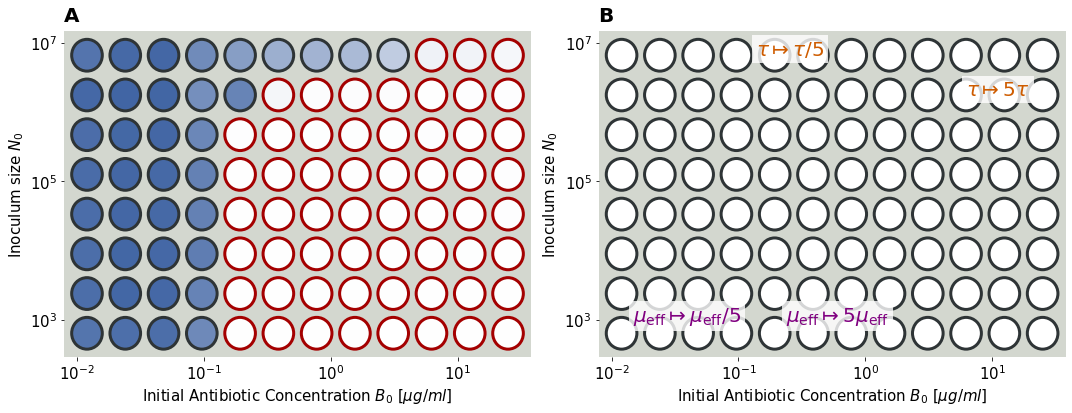

In [9]:
filename             = basedir + 'ChangeEPS/ChangeEPS_G238S.xlsx'
experiment_index     = 1
experiment_data      = prc.PlateReaderData(infiles = [filename])
platedata, threshold = rescale(experiment_data[experiment_index].T, experiment_data.EstimateGrowthThreshold())
design               = experiment_data.get_design(0)
plate_size           = {'Nmin':np.min(design[1]), 'Nmax':np.max(design[1]), 'Bmin':np.min(design[0]), 'Bmax':np.max(design[0])}
estimates            = results[results['Filename'] == filename].iloc[experiment_index,:]
fig, ax              = plt.subplots(1,2,figsize = (plot_xfigsize,5.5))

color_change_tau = '#ce5c00'
color_change_mu  = 'purple'

for x in range(platedata.shape[0]):
    for y in range(platedata.shape[1]):
        plot_well(ax[0], [x,y], platedata[x,y], threshold, plate_size, platedata.shape)
        plot_well(ax[1], [x,y],              0,        -1, plate_size, platedata.shape)

nlist             = np.exp(np.linspace(np.log(1e2),np.log(2e7),num=50))
mspcurve          = design2grid(np.array([BfuncN(nlist,1/estimates['NB_tau'],estimates['NB_sMIC']),nlist]).T, plate_size)

scalefactor       = 5.
mspcurve_tau_inc  = design2grid(np.array([BfuncN(nlist,(1./scalefactor)/estimates['NB_tau'],estimates['NB_sMIC']),nlist]).T, plate_size)
mspcurve_tau_dec  = design2grid(np.array([BfuncN(nlist,scalefactor/estimates['NB_tau'],estimates['NB_sMIC']),nlist]).T, plate_size)
mspcurve_smic_inc = design2grid(np.array([BfuncN(nlist,1/estimates['NB_tau'],scalefactor*estimates['NB_sMIC']),nlist]).T, plate_size)
mspcurve_smic_dec = design2grid(np.array([BfuncN(nlist,1/estimates['NB_tau'],(1./scalefactor)*estimates['NB_sMIC']),nlist]).T, plate_size)

ax[0].plot(mspcurve[:,0],mspcurve[:,1], lw = 5, c = 'red', zorder = 100)
ax[1].plot(mspcurve[:,0],mspcurve[:,1], lw = 5, c = 'red', zorder = 100)
ax[1].plot(mspcurve_tau_inc[:,0],  mspcurve_tau_inc[:,1],  lw = 3, c = color_change_tau)
ax[1].plot(mspcurve_tau_dec[:,0],  mspcurve_tau_dec[:,1],  lw = 3, c = color_change_tau, linestyle = '--')
ax[1].plot(mspcurve_smic_inc[:,0], mspcurve_smic_inc[:,1], lw = 3, c = color_change_mu)
ax[1].plot(mspcurve_smic_dec[:,0], mspcurve_smic_dec[:,1], lw = 3, c = color_change_mu, linestyle = '--')

ax[1].annotate(r'$\tau\mapsto{}\tau$'.format(int(scalefactor)),                              [9.0,1.0], c = color_change_tau, fontsize = 20, weight = 'bold').set_bbox({'facecolor': 'white', 'alpha': .8,'edgecolor': None, 'linewidth': 0})
ax[1].annotate(r'$\tau\mapsto\tau/{}$'.format(int(scalefactor)),                             [3.5,0.0], c = color_change_tau, fontsize = 20, weight = 'bold').set_bbox({'facecolor': 'white', 'alpha': .8,'edgecolor': None, 'linewidth': 0})
ax[1].annotate(r'$\mu_\mathrm{{eff}}\mapsto{}\mu_\mathrm{{eff}}$'.format(int(scalefactor)),  [4.3,6.7], c = color_change_mu,  fontsize = 20, weight = 'bold').set_bbox({'facecolor': 'white', 'alpha': .8,'edgecolor': None, 'linewidth': 0})
ax[1].annotate(r'$\mu_\mathrm{{eff}}\mapsto\mu_\mathrm{{eff}}/{}$'.format(int(scalefactor)), [0.3,6.7], c = color_change_mu,  fontsize = 20, weight = 'bold').set_bbox({'facecolor': 'white', 'alpha': .8,'edgecolor': None, 'linewidth': 0})

adjust_ax(ax[0], plate_size)
adjust_ax(ax[1], plate_size)
fig.tight_layout()
ax[0].annotate('A',[0,1.03],weight='bold',fontsize = panelID_fontsize, xycoords = 'axes fraction')
ax[1].annotate('B',[0,1.03],weight='bold',fontsize = panelID_fontsize, xycoords = 'axes fraction')

fig.savefig('fig3_platedata.pdf')
fig.savefig('fig3_platedata.png')


In [10]:
def adjust_ax_fig2_N(ax):
    ax.set_yscale('log')
    ax.set_ylim([1e0,2e7])
    ax.set_yticks([1e1,1e3,1e5,1e7])
    ax.set_xticks([0,6,12,18,24])
    ax.set_xlim([0,24])
    ax.set_xlabel(r'Time $t$ $[h]$', fontsize = label_fontsize)
    ax.set_ylabel(r'Population Size $N$', fontsize = label_fontsize)
    ax.tick_params(labelsize = axes_fontsize)

def adjust_ax_fig2_B(ax):
    #ax.set_yscale('log')
    ax.set_ylim([0,3])
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([0,6,12,18,24])
    ax.set_xlim([0,24])
    ax.set_xlabel(r'Time $t$ $[h]$', fontsize = label_fontsize)
    ax.set_ylabel(r'Antibiotic Concentration $B$', fontsize = label_fontsize)
    ax.tick_params(labelsize = axes_fontsize)


def PlotFadingTrajectory(ax, x, y, threshold1 = 2e4, threshold2 = 4e5, color1 = [0,255,255], color2 = [255,255,255], label = None, plot_params = {}):
    data            = pd.DataFrame({'x':x,'y':y})
    data_c1         = data[data['y'] <= threshold1]
    data_transition = data[(threshold1 < data['y']) & (data['y'] <= threshold2)]
    data_c2         = data[threshold2 < data['y']]
    
    if len(data_c1) > 0 and len(data_transition) > 0:
        data_transition = pd.concat([data_c1.tail(1), data_transition])
    if len(data_c2) > 0 and len(data_transition) > 0:
        data_transition = pd.concat([data_transition, data_c2.head(1)])
    
    ax.plot(data_c1['x'], data_c1['y'], c = patch_color(1, color1 = color1, color2 = color2), **plot_params, label = label)
    
    if len(data_transition) > 1:
        for i in range(len(data_transition)-1):
            t = 1. - 1. * i/len(data_transition)
            ax.plot(data_transition['x'].values[i:i+2], data_transition['y'].values[i:i+2], c = patch_color(t, color1 = color1, color2 = color2), **plot_params)

    if len(data_c2) > 0:
        ax.plot(data_c2['x'],data_c2['y'], c = patch_color(0, color1 = color1, color2 = color2), **plot_params)
    
    
    
class EnzymePopulationDynamics(object):
    def __init__(self, **kwargs):
        self.__initial_popsize = kwargs.get('popsize',1e4)
        self.__initial_ABconc  = kwargs.get('ABConc',1.5)
        self.__initial_enzyme  = kwargs.get('EnzymeConc',0)
        self.__epsilon         = kwargs.get('epsilon',1e-3)
        self.__rho             = kwargs.get('rho',1e-3)
        
        self.__growthrate      = kwargs.get('growthrate',1.)
        self.__kappa           = kwargs.get('kappa',2.)
        self.__gamma           = kwargs.get('gamma',2.)
        
        self.integration_step  = kwargs.get('integrationstep',1e-2)
        self.output_step       = kwargs.get('outputstep',10)
        self.maxtime           = kwargs.get('maxtime',24)
        
        self.x                 = np.array([[self.__initial_popsize, self.__initial_enzyme, self.__initial_ABconc]])
        self.time              = 0
  

    def RungeKutta4(self, func, xx ,time):
        # 4th order Runge-Kutta integration scheme
        k1 = self.integration_step * func(xx,            time)
        k2 = self.integration_step * func(xx + 0.5 * k1, time + 0.5 * self.integration_step)
        k3 = self.integration_step * func(xx + 0.5 * k2, time + 0.5 * self.integration_step)
        k4 = self.integration_step * func(xx + k3,       time +       self.integration_step)
        return xx + (k1 + 2. * k2 + 2. * k3 + k4)/6.
    
        
    def dynamics(self, x, time):
        bk = np.power(x[2], self.__kappa)
        return np.array([
            self.__growthrate * (1 - bk)/(1 + bk/self.__gamma) * x[0],
            self.__rho * x[0],
            np.max([-self.__epsilon * x[1] * x[2],-x[2]])   # second max option restricts
                                                            # large changes in integrator step.
                                                            # enzyme x[1] can explode on exp grow pop x[0]
        ])
    
    def run(self):
        i = 0
        xlast = self.x[-1]
        while self.time <= self.maxtime:
            xnew = self.RungeKutta4(self.dynamics, xlast, self.time)
            if xnew[0] < 1: xnew[0] = 0
            if xnew[2] < 0: xnew[2] = 0
            xlast = xnew
            i += 1
            if i % self.output_step == 0:
                self.x = np.concatenate([self.x,[xnew]], axis = 0)
            self.time += self.integration_step
        
        return pd.DataFrame({'time':np.arange(len(self.x[:,0])) * self.integration_step * self.output_step, 'N':self.x[:,0], 'E':self.x[:,1], 'B':self.x[:,2]})
    

In [11]:
default_params = {'epsilon':1e-2, 'rho':1e-2}

trajectories = {}

for nexp in range(1,5):
    trajectories[nexp] = {}
    print(nexp)
    for abconc in np.linspace(0,3, num = 31):
        b0 = '{:.2f}'.format(abconc)
        trajectories[nexp][b0] = EnzymePopulationDynamics(popsize = 10**nexp, ABConc = abconc, **default_params).run()


1
2
3
4


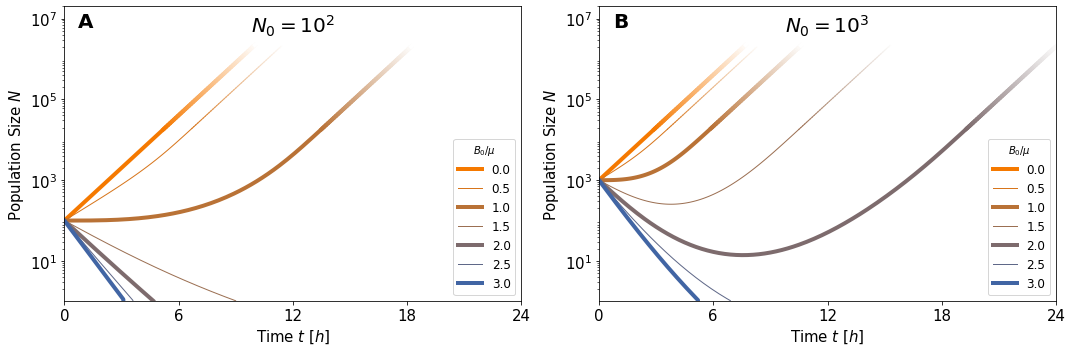

In [12]:
fig,ax = plt.subplots(1,2,figsize = (plot_xfigsize,5))
abclist = [b0 for b0 in trajectories[1].keys() if int(float(b0)*10) % 5 == 0]

for b0 in abclist:
    color = patch_color(float(b0)/3, color2 = [245,121,0], hexoutput=False)
    plot_params = {'lw':1}
    lgnd_label = '{:.1f}'.format(float(b0))
    if int(float(b0)*10)%10==0:
        plot_params.update({'lw':4})
    for nexp in range(2,4):
        PlotFadingTrajectory(ax[nexp-2], trajectories[nexp][b0]['time'].values, trajectories[nexp][b0]['N'].values, color1 = color, threshold2 = 2e6, label = lgnd_label, plot_params = plot_params)
adjust_ax_fig2_N(ax[0])
adjust_ax_fig2_N(ax[1])
#adjust_ax_fig2_N(ax[2])

ax[0].annotate('A',[.03,.93],weight='bold',fontsize = panelID_fontsize, xycoords = 'axes fraction')
ax[1].annotate('B',[.03,.93],weight='bold',fontsize = panelID_fontsize, xycoords = 'axes fraction')
#ax[2].annotate('C',[.03,.93],weight='bold',fontsize = panelID_fontsize, xycoords = 'axes fraction')

ax[0].annotate(r'$N_0=10^2$',[.5,.91],fontsize = panelID_fontsize, xycoords = 'axes fraction',ha='center')
ax[1].annotate(r'$N_0=10^3$',[.5,.91],fontsize = panelID_fontsize, xycoords = 'axes fraction',ha='center')


ax[0].legend(title=r'$B_0/\mu$', fontsize = legend_fontsize, loc = 'lower right')
ax[1].legend(title=r'$B_0/\mu$', fontsize = legend_fontsize, loc = 'lower right')
#ax[2].legend(title=r'$B_0/\mu_0$', fontsize = legend_fontsize, loc = 'lower right')

fig.tight_layout()
fig.savefig('fig2_trajectories_variant.pdf')
fig.savefig('fig2_trajectories_variant.png')


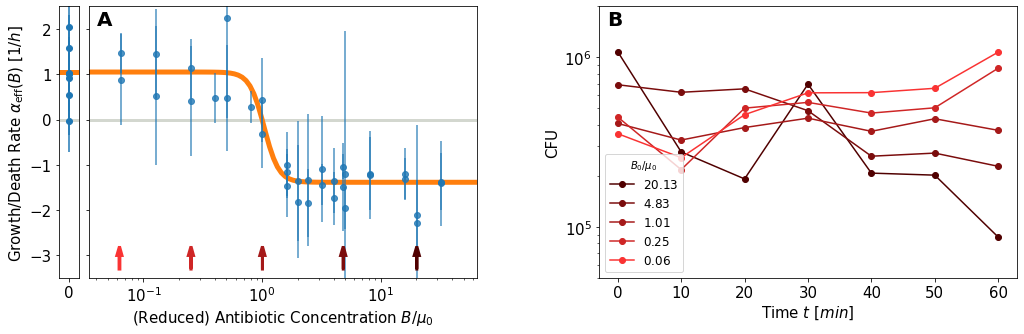

In [13]:
# classic growth measurements

def aeff(b, alpha, mu0, kappa, gamma):
    bmk = np.power(b/mu0,kappa)
    return alpha * (1 - bmk)/(1 + bmk/gamma)

growth_scmic = 1.242e-2
growth_alpha = 1.049
growth_gamma = 1.320
growth_kappa = 7.049


datadir = '../ExperimentalData/KillCurves'

fig      = plt.figure(figsize = (plot_xfigsize,5))
subfigs  = fig.subfigures(1,2)
ax0      = subfigs[0].subplots(1,2, gridspec_kw = {'width_ratios': [1,19], 'wspace':.05})
ax1      = subfigs[1].subplots(1,1)


growthrate_data = None
for fn in glob.glob(datadir + '/*.growthrates'):
    cur_data        = pd.read_csv(fn, skiprows=1, names = ['abconc','growthrate','growthrate_stddev'], delim_whitespace=True)
    growthrate_data = AddDF(growthrate_data, cur_data)

trajectory_data = pd.read_csv(datadir + '/alldata_trajectories', delim_whitespace = True)
    
ax0[0].set_ylim([-3.5,2.5])
ax0[0].set_xlim([-1e-5,1e-5])
ax0[0].set_xticks([0])
ax0[0].errorbar(growthrate_data['abconc']/growth_scmic, growthrate_data['growthrate'], growthrate_data['growthrate_stddev'], marker = 'o',ls = '')
ax0[0].plot(np.array([-1e-5,1e-5]), aeff(np.array([0,0]) * growth_scmic, growth_alpha, growth_scmic, growth_kappa, growth_gamma), lw = 5, zorder = 1)
ax0[0].tick_params(labelsize = axes_fontsize)
ax0[1].set_xscale('log')
ax0[1].set_xlim([.035,65])
ax0[1].set_ylim([-3.5,2.5])
ax0[1].tick_params(labelsize = axes_fontsize)

abconc_red = np.exp(np.linspace(np.log(ax0[1].get_xlim()[0]), np.log(ax0[1].get_xlim()[1]), 100))

ax0[1].errorbar(growthrate_data['abconc']/growth_scmic, growthrate_data['growthrate'], growthrate_data['growthrate_stddev'], marker = 'o',ls = '', alpha = .8)
ax0[1].plot(abconc_red, aeff(abconc_red * growth_scmic, growth_alpha, growth_scmic, growth_kappa, growth_gamma), lw = 5, zorder = 1)

ax0[0].hlines(0, ax0[0].get_xlim()[0], ax0[0].get_xlim()[1], color = '#d3d7cf', lw = 3, zorder = -1)
ax0[1].hlines(0, ax0[1].get_xlim()[0], ax0[1].get_xlim()[1], color = '#d3d7cf', lw = 3, zorder = -1)


ax0[1].set_yticklabels([])
ax0[1].set_xlabel(r'(Reduced) Antibiotic Concentration $B/\mu_0$', fontsize = label_fontsize)
ax0[0].set_ylabel(r'Growth/Death Rate $\alpha_\mathrm{eff}(B)$ $[1/h]$', fontsize = label_fontsize)


avg_traj = {}
traj_pairs = [(6,15),(20,28),(35,43),(37,45),(39,47)]
for i,(idx1,idx2) in enumerate(traj_pairs):
    label = trajectory_data.columns[idx1]
    avg_traj[trajectory_data.columns[idx1]] = np.sqrt(trajectory_data[trajectory_data.columns[idx1]].values * trajectory_data[trajectory_data.columns[idx2]].values)
    col = patch_color(value = i/(len(traj_pairs)-1.), color1=[250,51,51], color2 = [80,0,0])
    b0_red = float(label)/growth_scmic
    ax1.plot(trajectory_data['#'], avg_traj[label], label = r'${:.2f}$'.format(float(label)/growth_scmic),marker = 'o', c = col)
    ax0[1].arrow(x=b0_red, y = -3.3, dx=0, dy = .3, color = col, lw = 3, zorder = 1000, head_width = b0_red*.1, head_length = .2)
ax1.set_yscale('log')
ax1.set_ylim([5e4,2e6])
ax1.set_xlim([-3,63])
ax1.tick_params(labelsize = axes_fontsize)

ax1.legend(fontsize = legend_fontsize, title = r'$B_0/\mu_0$', loc = 'lower left')

ax1.set_xlabel(r'Time $t$ $[min]$', fontsize = label_fontsize)
ax1.set_ylabel(r'CFU', fontsize = label_fontsize)
#fig.tight_layout()


ax0[1].annotate('A',[.02,.93], weight = 'bold', fontsize = panelID_fontsize, xycoords = 'axes fraction')
ax1.   annotate('B',[.02,.93], weight = 'bold', fontsize = panelID_fontsize, xycoords = 'axes fraction')


fig.savefig('fig1_growthrates.pdf')
fig.savefig('fig1_growthrates.png')


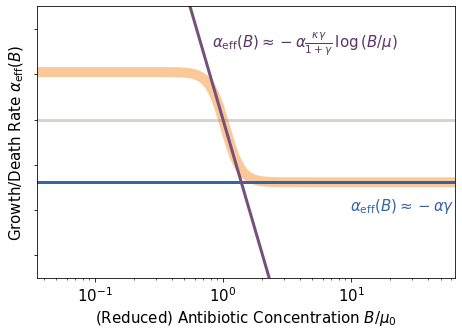

In [14]:
fig,ax = plt.subplots(1,1,figsize = (plot_xfigsize/2,5))


ax.set_xscale('log')
ax.set_xlim([.035,65])
ax.set_ylim([-3.5,2.5])
ax.tick_params(labelsize = axes_fontsize)

ax.plot(abconc_red, aeff(abconc_red * growth_scmic, growth_alpha, growth_scmic, growth_kappa, growth_gamma), lw = 10, zorder = 1, color = '#f57900', alpha = .4)

ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], color = '#d3d7cf', lw = 3, zorder = -1)

ax.plot(abconc_red, -growth_alpha*growth_gamma * np.ones_like(abconc_red), lw = 3, color = '#3465a4')
ax.plot(abconc_red, -growth_alpha*growth_gamma*growth_kappa/(1+growth_gamma)*np.log(abconc_red), lw = 3, color = '#75507b')

ax.annotate(r'$\alpha_\mathrm{eff}(B) \approx -\alpha\gamma$', [.75,.25], fontsize = label_fontsize, xycoords = 'axes fraction', color = '#3465a4')
ax.annotate(r'$\alpha_\mathrm{eff}(B) \approx -\alpha\frac{\kappa\gamma}{1+\gamma}\,\log\left(B/\mu\right)$', [.42,.85], fontsize = label_fontsize, xycoords = 'axes fraction', color = '#5c3566')

ax.set_yticklabels([])
ax.set_xlabel(r'(Reduced) Antibiotic Concentration $B/\mu_0$', fontsize = label_fontsize)
ax.set_ylabel(r'Growth/Death Rate $\alpha_\mathrm{eff}(B)$', fontsize = label_fontsize)


ax0[0].hlines(0, ax0[0].get_xlim()[0], ax0[0].get_xlim()[1], color = '#d3d7cf', lw = 3, zorder = -1)


fig.savefig('figS1_growthrate_approx.pdf')
fig.savefig('figS1_growthrate_approx.png')
